<h1 align=center><font size = 5>Coursera Data Science and Machine Learning Capstone Project</font></h1>
<h1 align=center><font size = 5>Segmenting Neighbourhood Toronto part 2 </font></h1>

This is data science capstone project in coursera from IBM week 3 assingment. In this project, we will cluster the neighbourhood of Toronto city using K-means clustering. In this part we will explore venues around neighbourhood using foursquare api and cluster the neighbourhood based on the type of venues around of each neighbourhood.

First, lets import the necessary library.

In [82]:
#import libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

# import k-means from clustering stage
from sklearn.cluster import KMeans
%matplotlib inline
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

import folium # plotting library

### Prepare the data

In [2]:
# prepare dataframe 
usecols = ['District', 'Neighbourhood', 'Latitude', 'Longitude']
toronto_neigh_df = pd.read_csv('Toronto_neighbourhood_list.csv', usecols = usecols)
toronto_neigh_df.head()

,District,Neighbourhood,Latitude,Longitude
0,Old Toronto,Alexandra Park,43.650758,-79.404298
1,Old Toronto,The Annex,43.670338,-79.407117
2,Old Toronto,Baldwin Village,43.655185,-79.397399
3,Old Toronto,Cabbagetown,43.664473,-79.366986
4,Old Toronto,CityPlace,43.639248,-79.396387


In [3]:
# check dataframe tail
toronto_neigh_df.tail()

,District,Neighbourhood,Latitude,Longitude
205,York,Old Mill,43.651301,-79.495475
206,York,Rockcliffe–Smythe,43.675280,-79.488650
207,York,Silverthorn,43.682123,-79.471572
208,York,Tichester,43.685502,-79.418731
209,York,Weston,43.700161,-79.516247


In [4]:
toronto_neigh_df.shape

(210, 4)

### Explore the venues of each neighbourhood

In [5]:
# set credentials
CLIENT_ID = 'LW5DNZJRTI4IPUAZPZDVTY5AAULYPCMKFZBKZZG2WZOU0FF4' # your Foursquare ID
CLIENT_SECRET = 'JNTE415PBKKEETQAYTWZQD01J0P1UWEK5ARTZEGNMJM1VPIW' # your Foursquare Secret
VERSION = '20190423'

In [10]:
# set a function to get venues data around a neighbourhood and put it in a dataframe
def getNearbyVenues(row, radius= 750, limit = 100):
    
    venues_list=[]
            
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            row.Latitude, 
            row.Longitude, 
            radius, 
            limit)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    venues_list.append([[
        row.District,
        row.Neighbourhood, 
        row.Latitude, 
        row.Longitude, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']] for v in results])

    # create dataframe to hold the results
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                      'Neighbourhood', 
                      'Neighbourhood Latitude', 
                      'Neighbourhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
    
    print(str(row.name) + '.  ' + row.District + ', ' + row.Neighbourhood + ' Success')
    return(nearby_venues)

In [11]:
# get all venues around each of neighbourhood
toronto_venues = pd.DataFrame(columns = ['District', 'Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 
                                         'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])
index = 0
failed_call = []
while index < toronto_neigh_df.shape[0]:
    
    try:
        temp_venue_df = getNearbyVenues(toronto_neigh_df.iloc[index])
        toronto_venues = toronto_venues.append(temp_venue_df, ignore_index=True)
        index = index + 1
        
    except:
        print("API call failed at {}".format(index))
        failed_call.append(index)
        index = index + 1

0.  Old Toronto, Alexandra Park Success
1.  Old Toronto, The Annex Success
2.  Old Toronto, Baldwin Village Success
3.  Old Toronto, Cabbagetown Success
4.  Old Toronto, CityPlace Success
5.  Old Toronto, Chinatown Success
6.  Old Toronto, Church and Wellesley Success
7.  Old Toronto, Corktown Success
8.  Old Toronto, Discovery District Success
9.  Old Toronto, Distillery District Success
10.  Old Toronto, The Entertainment District Success
11.  Old Toronto, East Bayfront Success
12.  Old Toronto, Fashion District Success
13.  Old Toronto, Financial District Success
14.  Old Toronto, Garden District Success
15.  Old Toronto, Grange Park Success
16.  Old Toronto, Harbord Village Success
17.  Old Toronto, Harbourfront Success
18.  Old Toronto, Kensington Market Success
19.  Old Toronto, Little Japan Success
20.  Old Toronto, Moss Park Success
21.  Old Toronto, Old Town Success
22.  Old Toronto, Quayside Success
23.  Old Toronto, Queen Street West Success
24.  Old Toronto, Regent Park Suc

The API call for data with index 119 is failed, lets try make a  call again by changing the radius a little.

In [12]:
index =119
try:
    temp_venue_df = getNearbyVenues(toronto_neigh_df.iloc[index], radius = 800)
    toronto_venues = toronto_venues.append(temp_venue_df, ignore_index=True)
        
except:
    print("API call still failed at {}".format(index))
    failed_call.append(index)

119.  Etobicoke, Stonegate-Queensway Success


Check the resulting dataframe.

In [13]:
# check the resulting dataframe
print(toronto_venues.shape)
toronto_venues.head()

(8621, 8)


,District,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Old Toronto,Alexandra Park,43.650758,-79.404298,Kanto,43.652167,-79.404843,Filipino Restaurant
1,Old Toronto,Alexandra Park,43.650758,-79.404298,Montauk,43.652084,-79.406898,Bar
2,Old Toronto,Alexandra Park,43.650758,-79.404298,#Hashtag Gallery,43.651830,-79.408103,Art Gallery
3,Old Toronto,Alexandra Park,43.650758,-79.404298,Porchetta & Co.,43.651576,-79.408950,Sandwich Place
4,Old Toronto,Alexandra Park,43.650758,-79.404298,Market 707,43.652128,-79.404844,Food Court


There are 8621 venues in total.

Lets check the number of returned venues for each neighbourhood. 

In [14]:
toronto_venues.groupby(['District', 'Neighbourhood']).count()

Neighbourhood Latitude  \
District    Neighbourhood                                        
East York   Bermondsey                                      15   
            Broadview North                                 13   
            Crescent Town                                   30   
            Governor's Bridge                               17   
            Leaside                                         63   
            O'Connor–Parkview                               21   
            Pape Village                                    31   
            Thorncliffe Park                                24   
            Woodbine Heights                                 8   
Etobicoke   Alderwood                                       14   
            Centennial Park                                 13   
            Clairville                                       3   
            Eatonville                                      15   
            Eringate                                         6   
            Humber Bay                                       5   
            Humber Heights – Westmount                      10   
            Humber Valley Village                           16   
            Humberwood                                       7   
            Islington–City Centre West                       6   
            Kingsview Village                               13   
            Long Branch                                     24   
            Markland Wood                                    4   
            Mimico                                          13   
            New Toronto                                     25   
            Princess Gardens                                13   
            Rexdale                                         11   
            Richview                                         4   
            Smithfield                                      26   
            Stonegate-Queensway                             34   
            Sunnylea                                         2   
...                                                        ...   
Scarborough Malvern                                         12   
            Maryvale                                        19   
            Milliken                                        47   
            Morningside                                     14   
            Morningside Heights                              1   
            Oakridge                                         7   
            Port Union                                      12   
            Rouge                                            4   
            Scarborough City Centre                         54   
            Scarborough Junction                             5   
            Scarborough Village                             13   
            Steeles                                          8   
            Tam O'Shanter – Sullivan                        12   
            West Hill                                       36   
            West Rouge                                       5   
            Wexford                                         23   
            Woburn                                          28   
York        Baby Point                                      18   
            Briar Hill–Belgravia                            23   
            Eglinton West                                   30   
            Fairbank                                        25   
            Humewood–Cedarvale                               5   
            Lambton                                         11   
            Mount Dennis                                    11   
            Oakwood–Vaughan                                 25   
            Old Mill                                         8   
            Rockcliffe–Smythe                               10   
            Silverthorn                                     16   
            Ti

Lets check the number of unique category of the venues.

In [15]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 363 uniques categories.


### Analyze each neighbourhood

Lets create one hot encoding for each venue based on its category.

In [16]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['District'] = toronto_venues['District'] 
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move the district and neighborhood column to the front
fixed_columns = list(toronto_onehot.columns[-2:]) + list(toronto_onehot.columns[:-2])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,District,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,Old Toronto,Alexandra Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Old Toronto,Alexandra Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Old Toronto,Alexandra Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Old Toronto,Alexandra Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Old Toronto,Alexandra Park,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, lets sum the hot encoding based on its neighbourhood to get the venues category vector for each neighbourhood.

In [17]:
toronto_grouped = toronto_onehot.groupby(['District', 'Neighbourhood']).sum().reset_index()
toronto_grouped

,District,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo
0,East York,Bermondsey,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,East York,Broadview North,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,East York,Crescent Town,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,East York,Governor's Bridge,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,East York,Leaside,0,0,0,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0
5,East York,O'Connor–Parkview,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,East York,Pape Village,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,East York,Thorncliffe Park,0,0,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,East York,Woodbine Heights,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Etobicoke,Alderwood,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# check the grouped dataframe shape
toronto_grouped.shape

(210, 365)

Next, lets create a new dataframe that display the top 10 venues for each neighborhood.

In [19]:
# create a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District', 'Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = toronto_grouped['District']
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,District,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,Bermondsey,Fast Food Restaurant,Sporting Goods Shop,Soccer Stadium,Office,Bakery,BBQ Joint,Gym / Fitness Center,Coffee Shop,Athletics & Sports,Café
1,East York,Broadview North,Café,Business Service,Farmers Market,Bank,Grocery Store,Scenic Lookout,Discount Store,Theater,Historic Site,Other Great Outdoors
2,East York,Crescent Town,Chinese Restaurant,Ice Cream Shop,Coffee Shop,Convenience Store,Gas Station,Electronics Store,Beer Store,Sushi Restaurant,Bank,Bakery
3,East York,Governor's Bridge,Park,Grocery Store,Trail,Bank,Skating Rink,Candy Store,Pharmacy,Farmers Market,Historic Site,Neighborhood
4,East York,Leaside,Coffee Shop,Bakery,Sporting Goods Shop,Indian Restaurant,Ice Cream Shop,Sandwich Place,Grocery Store,Asian Restaurant,Mexican Restaurant,Italian Restaurant


### Cluster the neighbourhood

Lets cluster the neighborhood into 5 clusters unsing K-means clustering.

In [27]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop(['District', 'Neighbourhood'], 1)

# set k-means clustering
kmeans = KMeans(n_clusters=kclusters, init= 'k-means++', n_init = 12, random_state=0)

# fit the model
kmeans.fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2], dtype=int32)

In [29]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


# merge neighborhoods_venues_sorted with toronto_neigh_df to add latitude/longitude for each neighborhood
toronto_merged = pd.merge(toronto_neigh_df, neighborhoods_venues_sorted, how='left', on=['District', 'Neighbourhood'])

toronto_merged.head() # check the last columns!

,District,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Old Toronto,Alexandra Park,43.650758,-79.404298,1,Bar,Vegetarian / Vegan Restaurant,Café,Italian Restaurant,Bakery,Dessert Shop,Pizza Place,Mexican Restaurant,Coffee Shop,Sandwich Place
1,Old Toronto,The Annex,43.670338,-79.407117,0,Pizza Place,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Sandwich Place,Restaurant,Deli / Bodega,Tea Room,Bakery,Burger Joint
2,Old Toronto,Baldwin Village,43.655185,-79.397399,1,Café,Vegetarian / Vegan Restaurant,Bar,Vietnamese Restaurant,Dumpling Restaurant,Bakery,Mexican Restaurant,Chinese Restaurant,Art Gallery,Coffee Shop
3,Old Toronto,Cabbagetown,43.664473,-79.366986,4,Restaurant,Coffee Shop,Café,Park,Thai Restaurant,Diner,Grocery Store,Beer Store,Bakery,Pub
4,Old Toronto,CityPlace,43.639248,-79.396387,4,Coffee Shop,Restaurant,Café,Italian Restaurant,Gym,Park,Grocery Store,Beer Bar,Bakery,Speakeasy


### Visualize the resulting cluster

In [31]:
# set toronto coordinate
latitude = 43.6532
longitude = -79.3832
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine the clusters

#### Cluster 0

In [94]:
Cluster = [None]*5
Cluster[0] = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
Cluster[0]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,The Annex,Pizza Place,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Sandwich Place,Restaurant,Deli / Bodega,Tea Room,Bakery,Burger Joint
22,Quayside,Coffee Shop,Theater,Park,Boat or Ferry,Bakery,Pub,Café,Circus,Liquor Store,Bank
32,The Beaches,Beach,Pub,Japanese Restaurant,Coffee Shop,Bar,Breakfast Spot,Tea Room,Thai Restaurant,BBQ Joint,Pizza Place
37,Leslieville,Coffee Shop,Bar,Pizza Place,Sandwich Place,Café,Italian Restaurant,Diner,Bakery,Fast Food Restaurant,Grocery Store
39,Playter Estates,Greek Restaurant,Coffee Shop,Pub,Ice Cream Shop,Café,Furniture / Home Store,Italian Restaurant,Grocery Store,Pizza Place,Yoga Studio
42,Upper Beaches,Beach,Pub,Japanese Restaurant,Coffee Shop,Bar,Breakfast Spot,Tea Room,Thai Restaurant,BBQ Joint,Pizza Place
44,Casa Loma,Coffee Shop,Sandwich Place,Park,Café,Pizza Place,Jewish Restaurant,Vegetarian / Vegan Restaurant,History Museum,Burger Joint,Mexican Restaurant
46,Davisville Village,Coffee Shop,Sandwich Place,Fast Food Restaurant,Café,Dessert Shop,Gym,Pizza Place,Gastropub,Restaurant,Italian Restaurant
49,Lawrence Park,Bakery,Coffee Shop,Italian Restaurant,Sushi Restaurant,Asian Restaurant,Bank,Grocery Store,Sandwich Place,Burger Joint,Tea Room
55,South Hill,Coffee Shop,Sandwich Place,Park,Café,Jewish Restaurant,Pizza Place,Mexican Restaurant,History Museum,French Restaurant,Italian Restaurant


In [105]:
ser = np.array([], dtype = 'object')
for index in range(1, len(Cluster2.columns)):
    ser = np.insert(ser, len(ser), Cluster2[Cluster2.columns[index]].values)

ser = pd.Series(ser)
ser.value_counts()[:10]

Park                    69
Coffee Shop             63
Sandwich Place          43
Pizza Place             42
Fast Food Restaurant    41
Grocery Store           41
Ethiopian Restaurant    37
Empanada Restaurant     32
Event Space             32
Pharmacy                29
dtype: int64

#### Cluster 1 

In [95]:
Cluster[1] = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
Cluster[1]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alexandra Park,Bar,Vegetarian / Vegan Restaurant,Café,Italian Restaurant,Bakery,Dessert Shop,Pizza Place,Mexican Restaurant,Coffee Shop,Sandwich Place
2,Baldwin Village,Café,Vegetarian / Vegan Restaurant,Bar,Vietnamese Restaurant,Dumpling Restaurant,Bakery,Mexican Restaurant,Chinese Restaurant,Art Gallery,Coffee Shop
5,Chinatown,Café,Vegetarian / Vegan Restaurant,Bar,Dumpling Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant
18,Kensington Market,Café,Bar,Vegetarian / Vegan Restaurant,Bakery,Mexican Restaurant,Vietnamese Restaurant,Coffee Shop,Taco Place,Ramen Restaurant,Cocktail Bar
21,Old Town,Bar,Café,Bakery,Coffee Shop,Clothing Store,Beer Store,Mexican Restaurant,Caribbean Restaurant,Grocery Store,Park
33,East Chinatown,Café,Vegetarian / Vegan Restaurant,Bar,Dumpling Restaurant,Coffee Shop,Ice Cream Shop,Bakery,Mexican Restaurant,Chinese Restaurant,Vietnamese Restaurant
53,North Toronto,Bar,Café,Restaurant,Cocktail Bar,Bakery,Asian Restaurant,Coffee Shop,Italian Restaurant,Gift Shop,Theater
60,Beaconsfield Village,Bar,Café,Bakery,Coffee Shop,Cocktail Bar,Italian Restaurant,Vietnamese Restaurant,Asian Restaurant,Vegetarian / Vegan Restaurant,Restaurant
67,Dovercourt Park,Bar,Bakery,Coffee Shop,Café,Pet Store,Middle Eastern Restaurant,Juice Bar,Beer Bar,Restaurant,Pharmacy
68,Dufferin Grove,Bar,Coffee Shop,Bakery,Vegetarian / Vegan Restaurant,Café,Restaurant,Italian Restaurant,Asian Restaurant,Wine Bar,Japanese Restaurant


#### Cluster 2

In [96]:
Cluster[2] = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
Cluster[2]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,East Bayfront,Cosmetics Shop,Supermarket,Bank,Food & Drink Shop,Pharmacy,Food Court,Farmers Market,Empanada Restaurant,Ethiopian Restaurant,Food Service
19,Little Japan,Coffee Shop,Train Station,Pharmacy,Fried Chicken Joint,Park,Café,Soccer Field,Diner,Breakfast Spot,Laundromat
28,Toronto Islands,Theme Park,American Restaurant,Pizza Place,Scenic Lookout,Harbor / Marina,Beach,Park,Beer Garden,Farm,Zoo
34,East Danforth,Coffee Shop,Pizza Place,Bus Line,Ice Cream Shop,Indian Restaurant,Skating Rink,Sushi Restaurant,Furniture / Home Store,Fried Chicken Joint,Breakfast Spot
38,Main Square,Coffee Shop,Bus Line,Chinese Restaurant,Skating Rink,Ice Cream Shop,Pizza Place,Breakfast Spot,Fish & Chips Shop,Fast Food Restaurant,Fried Chicken Joint
40,Port Lands,Boat or Ferry,Harbor / Marina,Athletics & Sports,Circus,Pool,Golf Driving Range,Trail,BBQ Joint,Beach,Supermarket
41,Riverdale,Vietnamese Restaurant,Bakery,Café,Park,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Breakfast Spot,Brewery
43,Bedford Park,Bakery,Accessories Store,Grocery Store,Pharmacy,Pub,Coffee Shop,Restaurant,Sandwich Place,Seafood Restaurant,Shoe Store
48,Forest Hill,Park,Café,Mediterranean Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Liquor Store,Sandwich Place,Bank,Bakery
50,Lytton Park,Skating Rink,Playground,Garden,Zoo,Fast Food Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit


#### Cluster 3

In [97]:
Cluster[3] = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
Cluster[3]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Harbord Village,Korean Restaurant,Café,Restaurant,Bar,Bakery,Coffee Shop,Pizza Place,Sushi Restaurant,Dessert Shop,Asian Restaurant
74,Koreatown,Korean Restaurant,Coffee Shop,Café,Japanese Restaurant,Grocery Store,Cocktail Bar,Indian Restaurant,Ethiopian Restaurant,Bakery,Ice Cream Shop
79,Mirvish Village,Korean Restaurant,Pizza Place,Coffee Shop,Grocery Store,Restaurant,Bakery,Japanese Restaurant,Café,Sushi Restaurant,Ice Cream Shop
85,Seaton Village,Korean Restaurant,Grocery Store,Coffee Shop,Café,Japanese Restaurant,Park,Ice Cream Shop,Restaurant,Tea Room,Sandwich Place
151,Newtonbrook,Korean Restaurant,Middle Eastern Restaurant,Coffee Shop,Café,Pizza Place,Fast Food Restaurant,Grocery Store,Vietnamese Restaurant,Discount Store,Pharmacy
152,North York City Centre,Coffee Shop,Japanese Restaurant,Fast Food Restaurant,Ramen Restaurant,Korean Restaurant,Sandwich Place,Pizza Place,Restaurant,Café,Middle Eastern Restaurant
161,Willowdale,Korean Restaurant,Bubble Tea Shop,Coffee Shop,Café,Ramen Restaurant,Dessert Shop,Pizza Place,Vietnamese Restaurant,Sushi Restaurant,Japanese Restaurant


#### Cluster 4

In [98]:
Cluster[4] = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
Cluster[4]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Cabbagetown,Restaurant,Coffee Shop,Café,Park,Thai Restaurant,Diner,Grocery Store,Beer Store,Bakery,Pub
4,CityPlace,Coffee Shop,Restaurant,Café,Italian Restaurant,Gym,Park,Grocery Store,Beer Bar,Bakery,Speakeasy
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Burger Joint,Sushi Restaurant,Café,Restaurant,Gay Bar,Diner,Pizza Place,Mediterranean Restaurant
7,Corktown,Coffee Shop,Gym / Fitness Center,Bakery,Breakfast Spot,Restaurant,Bar,Hotel,Park,Pub,Thai Restaurant
8,Discovery District,Coffee Shop,Bubble Tea Shop,Art Gallery,Café,Clothing Store,Ice Cream Shop,Japanese Restaurant,Bar,Sushi Restaurant,Chinese Restaurant
9,Distillery District,Coffee Shop,Park,Bakery,Theater,Café,Pub,Italian Restaurant,Restaurant,Breakfast Spot,Boat or Ferry
10,The Entertainment District,Coffee Shop,Pizza Place,Hotel,Café,Sushi Restaurant,Italian Restaurant,Concert Hall,Thai Restaurant,Restaurant,Pub
12,Fashion District,Restaurant,Coffee Shop,Italian Restaurant,Yoga Studio,Sandwich Place,Bar,Beer Bar,French Restaurant,Taco Place,Gym
13,Financial District,Coffee Shop,Hotel,Café,Restaurant,Gastropub,Deli / Bodega,American Restaurant,Steakhouse,Thai Restaurant,Concert Hall
14,Garden District,Coffee Shop,Clothing Store,Restaurant,Café,Italian Restaurant,Middle Eastern Restaurant,Gastropub,Cosmetics Shop,Ramen Restaurant,Fast Food Restaurant


Lets check for dominant categories for each cluster by plot.

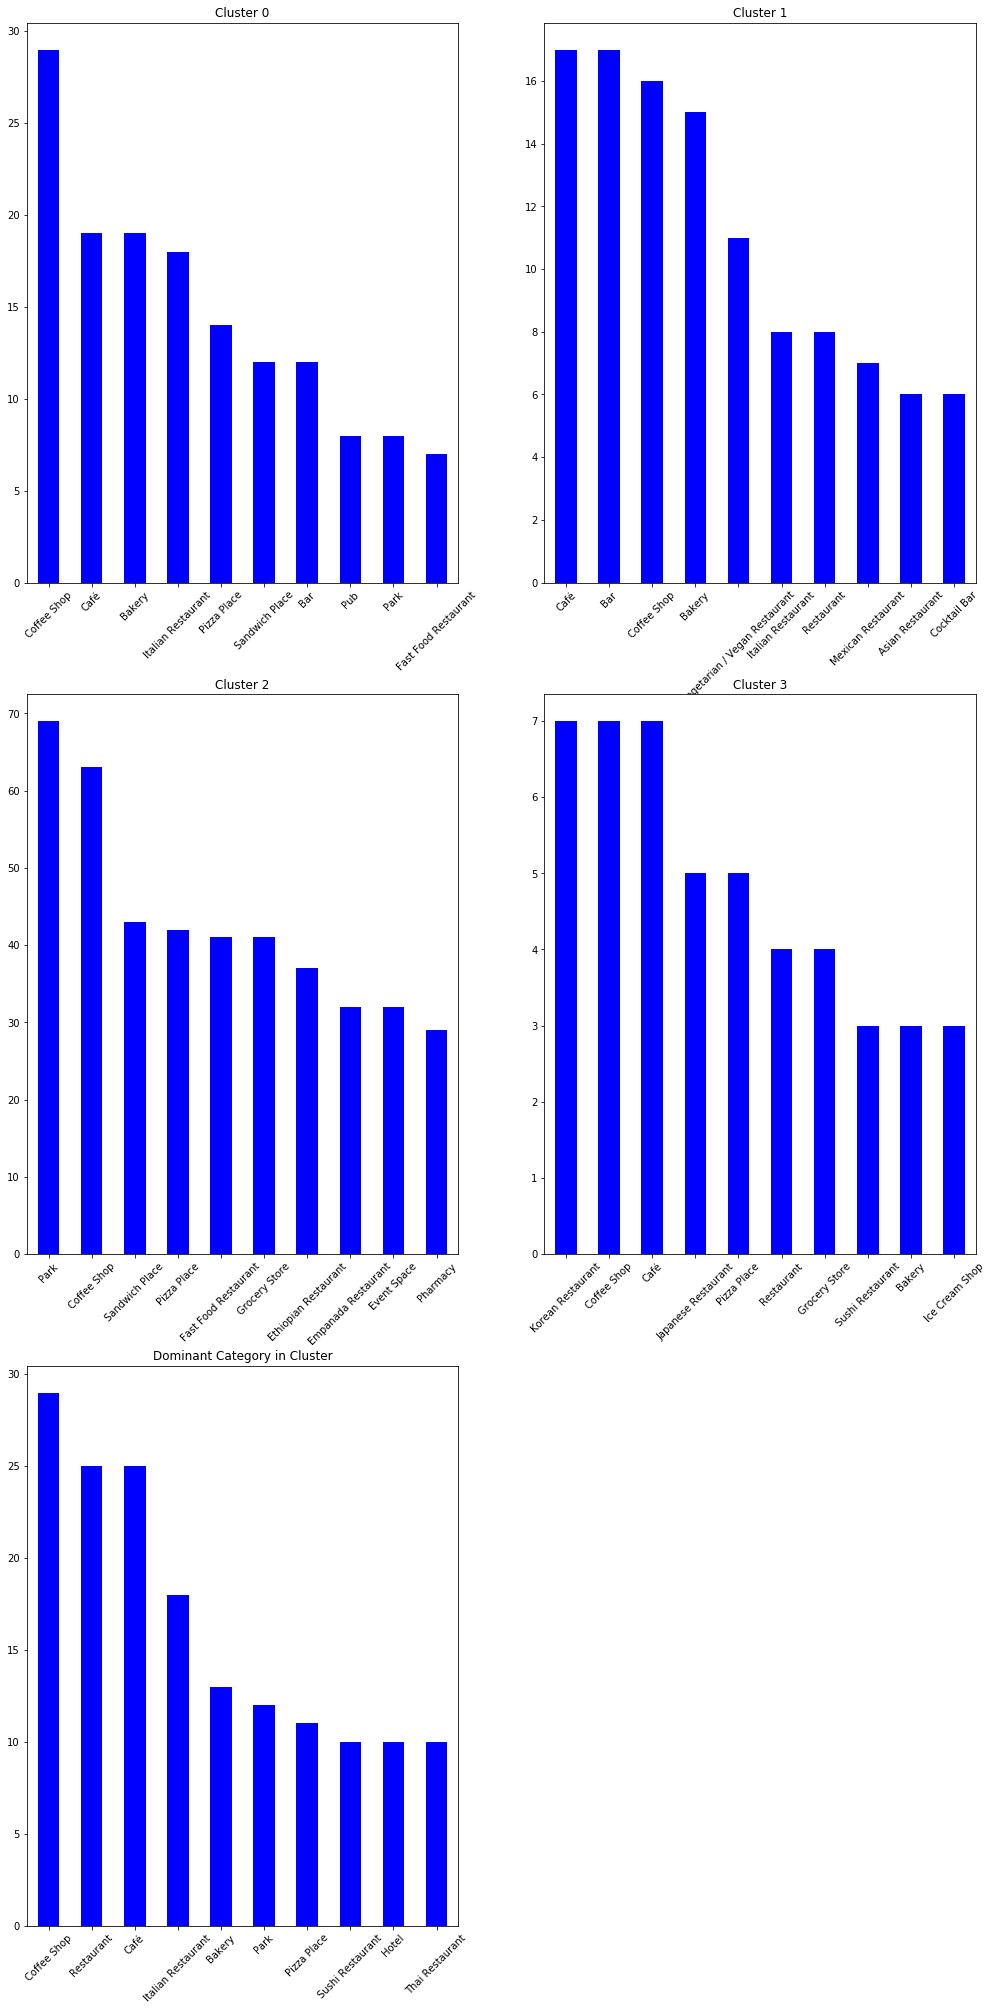

In [109]:
# create plot
fig = plt.figure(figsize = (17,35))
ax = []

# assign subplot
for index in range(1, 6):
    ax.append(fig.add_subplot(3, 2, index))

# for every cluster create bar plot    
for index in range(5):
    clus_ser = np.array([], dtype = 'object')
    
    for jndex in range(1, len(Cluster[index].columns)):
        clus_ser = np.insert(clus_ser, len(clus_ser), Cluster[index][Cluster[index].columns[jndex]].values)

    clus_ser = pd.Series(clus_ser).value_counts()[:10]
    clus_ser.plot(kind='bar', color='blue', ax=ax[index], title = 'Cluster {}'.format(index), rot = 45)

plt.title('Dominant Category in Cluster')
plt.show()

#### Save the results for future investigation

In [40]:
path = "Toronto_neighbourhood_cluster_category.csv"
toronto_merged.to_csv(path, index=False)

***<font size = 3>Author : Hadi Muhshi</font>*** 